Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits). 

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.model_selection с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
digits = load_digits() 
X = digits.data
y = digits.target

1. Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [15]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X, y, cv=10).mean()

0.8241247672253259

2. Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

    Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [17]:
bagging_clf = BaggingClassifier(n_estimators=100, random_state=0)
cross_val_score(bagging_clf, X, y, cv=10).mean()

0.927048417132216

3. Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [27]:
bagging_clf = BaggingClassifier(n_estimators=100, max_features=int(np.sqrt(X.shape[1])), random_state=0)
cross_val_score(bagging_clf, X, y, cv=10).mean()

0.9293389199255122

4. Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же sqrt(d) признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [34]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'), n_estimators=100, random_state=0)
cross_val_score(bagging_clf, X, y, cv=10).mean()

0.9460117939168218

5. Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

In [33]:
random_forest_clf = RandomForestClassifier(random_state=0)
cross_val_score(random_forest_clf, X, y, cv=10).mean()

0.9476939788950961

Text(0, 0.5, 'score')

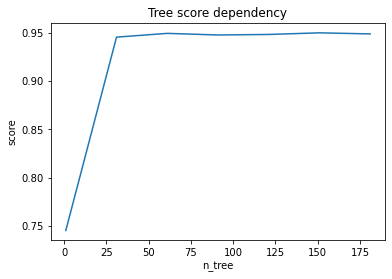

In [38]:
n_trees = np.arange(1, 200, 30)
score = [cross_val_score(RandomForestClassifier(n_estimators=n_tree, random_state=0), X, y, cv=10).mean() for n_tree in n_trees]

plt.plot(n_trees, score)
plt.title("Tree score dependency")
plt.xlabel('n_tree')
plt.ylabel('score')

Text(0, 0.5, 'score')

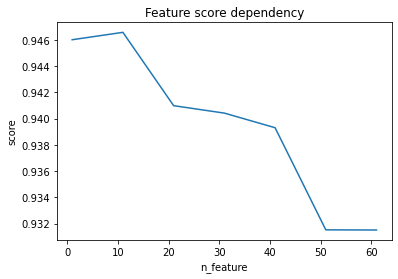

In [42]:
n_features = np.arange(1, X.shape[1], 10)
score = [cross_val_score(RandomForestClassifier(max_features=n_feature, random_state=0), X, y, cv=10).mean() for n_feature in n_features]

plt.plot(n_features, score)
plt.title("Feature score dependency")
plt.xlabel('n_feature')
plt.ylabel('score')

Text(0, 0.5, 'score')

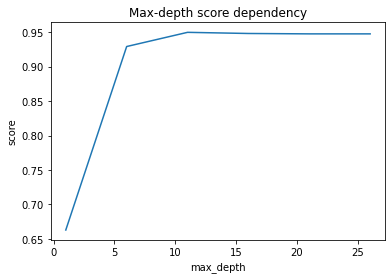

In [41]:
depths = np.arange(1, 30, 5)
score = [cross_val_score(RandomForestClassifier(max_depth=max_depth, random_state=0), X, y, cv=10).mean() for max_depth in depths]

plt.plot(depths, score)
plt.title("Max-depth score dependency")
plt.xlabel('max_depth')
plt.ylabel('score')

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев?

    **Ответ: нет, это не так. Каждое дерево в случайном лесе сильно переобучается, а качество обучения композиции деревьев выходит на некую константу в зависимости от числа деревьев в композиции.** 

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев?

    **Ответ: да, это так. При композиции алгоритмов разброс ошибки обратно пропорционален кол-ву алгоритмов, поэтому при маленьком числе деревьев качество хуже, чем при большом. Это и показано на графике выше.** 

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

    **Ответ: да, это в точности отражено на графике.**  

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

    **Ответ: все абсолютно верно. Чем меньше признаков, тем менее коррелированы становятся деревья. Но надо понимать, что слишком малое кол-во признаков не позволит “поймать” зависимость в данных.** 

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

    **Ответ: нет, это не верно. Почему это неверно, написано выше.** 

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

    **Ответ: нет, это не так. Чем более переобучено дерево тем лучше это для композиции. Переобучение нам здесь на руку.** 

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

    **Ответ: да, это так, что и подтверждают графики выше.** 